## Problem Statement:

Future forecasting of stock prices based on the historical stock price information.



### Approach: 

I will work with historical data of 'APPLE' and I will implement a mix of machine learning algorithms to predict the future stock price of this company, starting with simple algorithms like averaging and linear regression, and then move on to advanced techniques like Auto ARIMA and LSTM.

### Content:

1. Understanding the Problem Statement
2. Moving Average
3. Linear Regression, Ridge, Lasso
4. k-Nearest Neighbors
5. Auto ARIMA
6. Long Short Term Memory (LSTM)

1. Understanding the Problem Statement:
    
Stock market analysis is divided into two parts – Fundamental Analysis and Technical Analysis.
- Fundamental Analysis: involves analyzing the company’s future profitability on the basis of its current business environment and financial performance.

- Technical Analysis: , on the other hand, includes reading the charts and using statistical figures to identify the trends in the stock market.

As the focus is on forecasting the stock market price we perform Technical Analysis:

In [288]:
# import datareader library 
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [289]:
# Get the Authentication Key of TIINGO API- Replace with your own key
file1 = open("key.txt","r+")  
key = file1.read()

In [290]:
# API access key

df = pdr.get_data_tiingo('AAPL', api_key=key, start = '2015-01-01', end = '2020-01-22')

df.to_csv('AAPL.csv')

# load the datset into df
df = pd.read_csv("AAPL.csv")


In [291]:
# show first five records
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-01-02 00:00:00+00:00,109.33,111.44,107.350,111.39,53204626,24.896485,25.376972,24.445602,25.365586,212818504,0.0,1.0
1,AAPL,2015-01-05 00:00:00+00:00,106.25,108.65,105.410,108.29,64285491,24.195112,24.741637,24.003828,24.659658,257141964,0.0,1.0
2,AAPL,2015-01-06 00:00:00+00:00,106.26,107.43,104.630,106.54,65797116,24.197389,24.463820,23.826208,24.261150,263188464,0.0,1.0
3,AAPL,2015-01-07 00:00:00+00:00,107.75,108.20,106.695,107.20,40105934,24.536690,24.639163,24.296447,24.411445,160423736,0.0,1.0
4,AAPL,2015-01-08 00:00:00+00:00,111.89,112.15,108.700,109.23,59364547,25.479445,25.538652,24.753023,24.873714,237458188,0.0,1.0


In [292]:
# show last five records
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1267,AAPL,2020-01-15 00:00:00+00:00,311.34,315.50,309.55,311.85,30480882,77.167511,78.198592,76.723849,77.293918,121923528,0.0,1.0
1268,AAPL,2020-01-16 00:00:00+00:00,315.24,315.70,312.09,313.59,27207254,78.134150,78.248164,77.353403,77.725187,108829016,0.0,1.0
1269,AAPL,2020-01-17 00:00:00+00:00,318.73,318.74,315.00,316.27,34454117,78.999168,79.001646,78.074664,78.389442,137816468,0.0,1.0
1270,AAPL,2020-01-21 00:00:00+00:00,316.57,319.02,316.00,317.19,27235039,78.463798,79.071046,78.322520,78.617469,108940156,0.0,1.0
1271,AAPL,2020-01-22 00:00:00+00:00,317.70,319.99,317.31,318.58,25458115,78.743876,79.311466,78.647212,78.961989,101832460,0.0,1.0


From the above obserrvation, there are multiple variables in the dataset – date, open, high, low, close, etc..

- The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
- High, Low represent the maximum, minimum, and last price of the share for the day.

Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing – 2020-01-18, 2020-01-19, 2020-01-20.

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target variable.

Text(0.5, 1.0, 'Historic stock price of Apple')

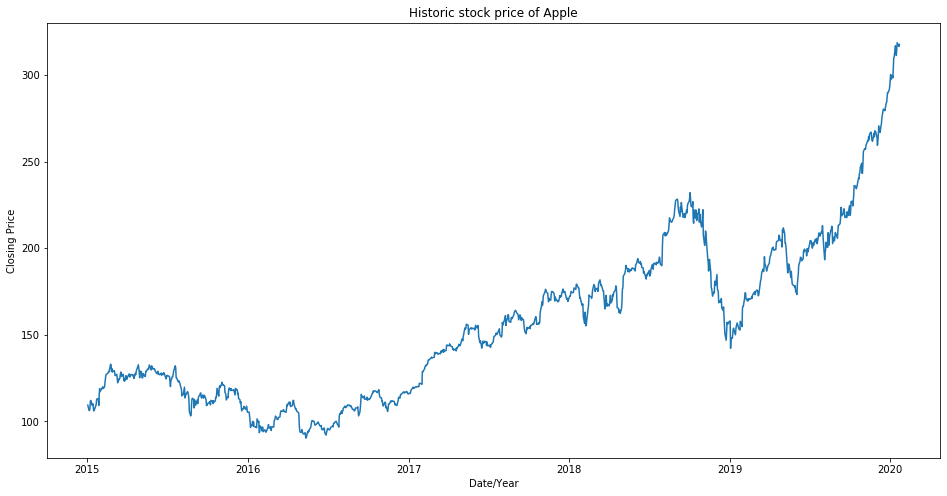

In [293]:
### Trend of Target Variable

# Setting the index to the date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.index = df['date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Apple close price history')
plt.xlabel("Date/Year")
plt.ylabel("Closing Price")
plt.title("Historic stock price of Apple")

### 2. Moving Average: 

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. 

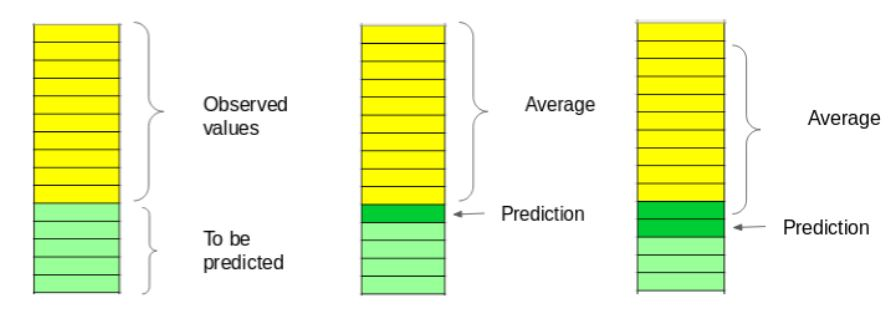

From above figure as said, in moving average algorithm the predicted value will be the average of previous set of observed values.

In [294]:
# creating new dataframe from df with selecting only date and close values
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
for i in range(0,len(data)):
     new_data['date'][i] = data['date'][i]
     new_data['close'][i] = data['close'][i]

In [295]:
# splitting dataset into train and test split 70-30%
# for time series next value is dependent on previous value so we split by indices
train_data= new_data[:int(len(new_data)*0.7)]
test_data = new_data[int(len(new_data)*0.7):]

In [296]:
# print training data first five and last five records
train_data.head(), train_data.tail() 

(                        date   close
 0  2015-01-02 00:00:00+00:00  109.33
 1  2015-01-05 00:00:00+00:00  106.25
 2  2015-01-06 00:00:00+00:00  106.26
 3  2015-01-07 00:00:00+00:00  107.75
 4  2015-01-08 00:00:00+00:00  111.89,
                           date   close
 885  2018-07-10 00:00:00+00:00  190.35
 886  2018-07-11 00:00:00+00:00  187.88
 887  2018-07-12 00:00:00+00:00  191.03
 888  2018-07-13 00:00:00+00:00  191.33
 889  2018-07-16 00:00:00+00:00  190.91)

In [297]:
# print test data first five and last five records
test_data.head(), test_data.tail()  

(                          date   close
 890  2018-07-17 00:00:00+00:00  191.45
 891  2018-07-18 00:00:00+00:00   190.4
 892  2018-07-19 00:00:00+00:00  191.88
 893  2018-07-20 00:00:00+00:00  191.44
 894  2018-07-23 00:00:00+00:00  191.61,
                            date   close
 1267  2020-01-15 00:00:00+00:00  311.34
 1268  2020-01-16 00:00:00+00:00  315.24
 1269  2020-01-17 00:00:00+00:00  318.73
 1270  2020-01-21 00:00:00+00:00  316.57
 1271  2020-01-22 00:00:00+00:00   317.7)

In [298]:
new_data.shape, train_data.shape, test_data.shape

((1272, 2), (890, 2), (382, 2))

In [299]:
# Predicting the n+1st element based on the average value of n elements
pred = []
for i in range(0, len(test_data)):
    sum_values = train_data['close'][i:].sum() + sum(pred)
    moving_avg = sum_values/len(train_data)
    pred.append(moving_avg)

In [300]:
# print the predicted values
test_data['pred'] = pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [301]:
test_data.head()

,date,close,pred
890,2018-07-17 00:00:00+00:00,191.45,133.031258
891,2018-07-18 00:00:00+00:00,190.4,133.057889
892,2018-07-19 00:00:00+00:00,191.88,133.088010
893,2018-07-20 00:00:00+00:00,191.44,133.118154
894,2018-07-23 00:00:00+00:00,191.61,133.146658


Root mean squared error (RMSE): RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

In [302]:
# Calculate Root Mean Square Erro measure for the deviation of values from actual
rms_ma = np.sqrt(np.mean(np.power((np.array(test_data['close'])-pred),2)))
print("Root Mean Square Error Value with Moving Average model: ", rms_ma)


Root Mean Square Error Value with Moving Average model:  81.10059396960423


Text(0.5, 1.0, 'Predicted vs Actual')

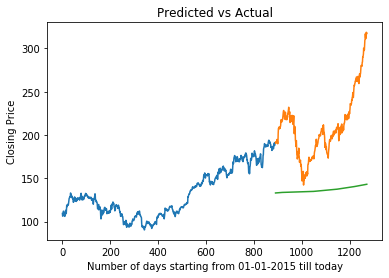

In [303]:
#plot between the actual and predicted forcasting values
plt.plot(train_data['close'])
plt.plot(test_data[['close', 'pred']])
plt.xlabel("Number of days starting from 01-01-2015 till today")
plt.ylabel("Closing Price")
plt.title("Predicted vs Actual")

### From above plot it is clear that using moving average the predicted values are totally missing the uncertain changes as it focussed on predicting future value based on average of all the past values.

So, Moving Average is not the correct choice for Stock Market Prediction.

### Weighted Moving Average
In some applications, one of the limitations of the simple moving average is that it gives equal weight to each of the daily prices included in the window.

E.g., in a 10-day moving average, the most recent day receives the same weight as the first day in the window: each price receives a 10% weighting


Compared to the Simple Moving Average, the Linearly Weighted Moving Average (or simply Weighted Moving Average, WMA), gives more weight to the most recent price and gradually less as we look back in time. On a 10-day weighted average, the price of the 10th day would be multiplied by 10, that of the 9th day by 9, the 8th day by 8 and so on. The total will then be divided by the sum of the weights (in this case: 55). In this specific example, the most recent price receives about 18.2% of the total weight, the second more recent 16.4%, and so on until the oldest price in the window that receives 0.02% of the weight.

In [304]:
# We will consider 20 days time slot window to calculate the rolling weighted average values
window_size=10
new_data.head()

,date,close
0,2015-01-02 00:00:00+00:00,109.33
1,2015-01-05 00:00:00+00:00,106.25
2,2015-01-06 00:00:00+00:00,106.26
3,2015-01-07 00:00:00+00:00,107.75
4,2015-01-08 00:00:00+00:00,111.89


In [305]:
#this creates an array with integers 1 to 20 included
weights = np.arange(1,window_size+1)
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [306]:
# Use apply and lambda function to calculate rolling average of closing price by applying weighted average
weighted_ma_price = test_data['close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
test_data['weight_ma_close'] = np.round(weighted_ma_price, decimals = 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


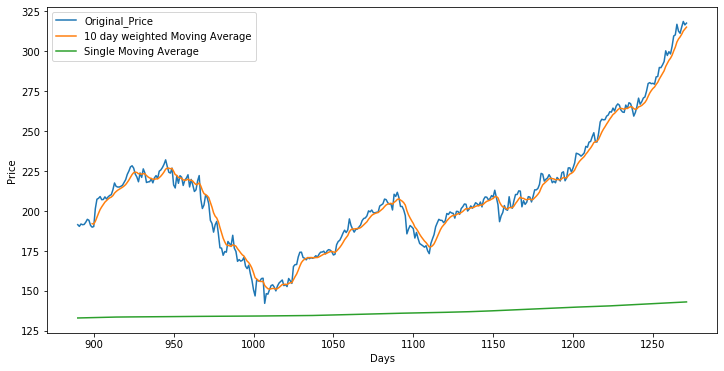

In [307]:
# Comparision of Original vs Moving Average with Weighted Moving average
plt.figure(figsize = (12,6))
plt.plot(new_data['close'][len(train_data):], label="Original_Price")
plt.plot(test_data['weight_ma_close'], label= str(window_size) + " day weighted Moving Average")
plt.plot(test_data['pred'], label="Single Moving Average")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [308]:
# predicted values for 30% test data part weighted moving averages
pred1 = test_data['weight_ma_close']

In [309]:
# Calculate Root Mean Square Error measure for the deviation of values from actual
rms_wma = np.sqrt(np.mean(np.power((np.array(test_data['close'])-pred1),2)))
print("Root Mean Square Error Value with Weighted Moving Average model: ", rms_wma)

Root Mean Square Error Value with Weighted Moving Average model:  4.463440476816108


### Linear Regression:

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

For our problem statement, we do not have a set of independent variables. We have only the dates instead. Let us use the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.

In [310]:
new_data.shape

(1272, 2)

In [311]:
#new_data = new_data.drop("weight_ma_close", axis=1)
new_data.head()

,date,close
0,2015-01-02 00:00:00+00:00,109.33
1,2015-01-05 00:00:00+00:00,106.25
2,2015-01-06 00:00:00+00:00,106.26
3,2015-01-07 00:00:00+00:00,107.75
4,2015-01-08 00:00:00+00:00,111.89


In [312]:
# creating new time based features
new_data['year'] = new_data['date'].dt.year
new_data['week'] = new_data['date'].dt.week
new_data['month'] = new_data['date'].dt.month
new_data['dayofweek'] = new_data['date'].dt.dayofweek
new_data['dayofyear'] = new_data['date'].dt.dayofyear
new_data['is_month_end'] = new_data['date'].dt.is_month_end
new_data['is_month_start'] = new_data['date'].dt.is_month_start
new_data['is_quarter_end'] = new_data['date'].dt.is_quarter_end
new_data['is_quarter_start'] = new_data['date'].dt.is_quarter_start
new_data['is_year_end'] = new_data['date'].dt.is_year_end
new_data['is_year_start'] = new_data['date'].dt.is_year_start

In [313]:
# Check version runing on Jupyter notebook
#new_data = new_data.drop(['Is_year_end', 'Is_year_start'], axis=1) 

In [314]:
new_data.head()

,date,close,year,week,month,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start
0,2015-01-02 00:00:00+00:00,109.33,2015,1,1,4,2,False,False,False,False,False,False
1,2015-01-05 00:00:00+00:00,106.25,2015,2,1,0,5,False,False,False,False,False,False
2,2015-01-06 00:00:00+00:00,106.26,2015,2,1,1,6,False,False,False,False,False,False
3,2015-01-07 00:00:00+00:00,107.75,2015,2,1,2,7,False,False,False,False,False,False
4,2015-01-08 00:00:00+00:00,111.89,2015,2,1,3,8,False,False,False,False,False,False


Apart from this, we can add our own set of features that we believe would be relevant for the predictions. For instance, my hypothesis is that the first and last days of the week could potentially affect the closing price of the stock far more than the other days. So I have created a feature that identifies whether a given day is Monday/Friday or Tuesday/Wednesday/Thursday. This can be done using the following lines of code:


If the day of week is equal to 0 or 4, the column value will be 1, otherwise 0. Similarly, you can create multiple features.

In [315]:
# creating new feature mon_fri
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['dayofweek'][i] == 0 or new_data['dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [316]:
new_data.head()

,date,close,year,week,month,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,mon_fri
0,2015-01-02 00:00:00+00:00,109.33,2015,1,1,4,2,False,False,False,False,False,False,1
1,2015-01-05 00:00:00+00:00,106.25,2015,2,1,0,5,False,False,False,False,False,False,1
2,2015-01-06 00:00:00+00:00,106.26,2015,2,1,1,6,False,False,False,False,False,False,0
3,2015-01-07 00:00:00+00:00,107.75,2015,2,1,2,7,False,False,False,False,False,False,0
4,2015-01-08 00:00:00+00:00,111.89,2015,2,1,3,8,False,False,False,False,False,False,0


In [317]:
#list1 = ['is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start']
#new_data[list1].astype(int)

In [318]:
#split into train and validation
train_data= new_data[:int(len(new_data)*0.7)]
test_data = new_data[int(len(new_data)*0.7):]

X_train = train_data.drop(['close', 'date'], axis=1)
y_train = train_data['close']
X_test = test_data.drop(['close', 'date'], axis=1)
y_test = test_data['close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [319]:
new_data.shape, train_data.shape, test_data.shape

((1272, 14), (890, 14), (382, 14))

In [320]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((890, 12), (890,), (382, 12), (382,))

In [321]:
#make predictions and find the rmse
y_pred = model.predict(X_test)
linear_rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
linear_rms

240.27916249074582

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


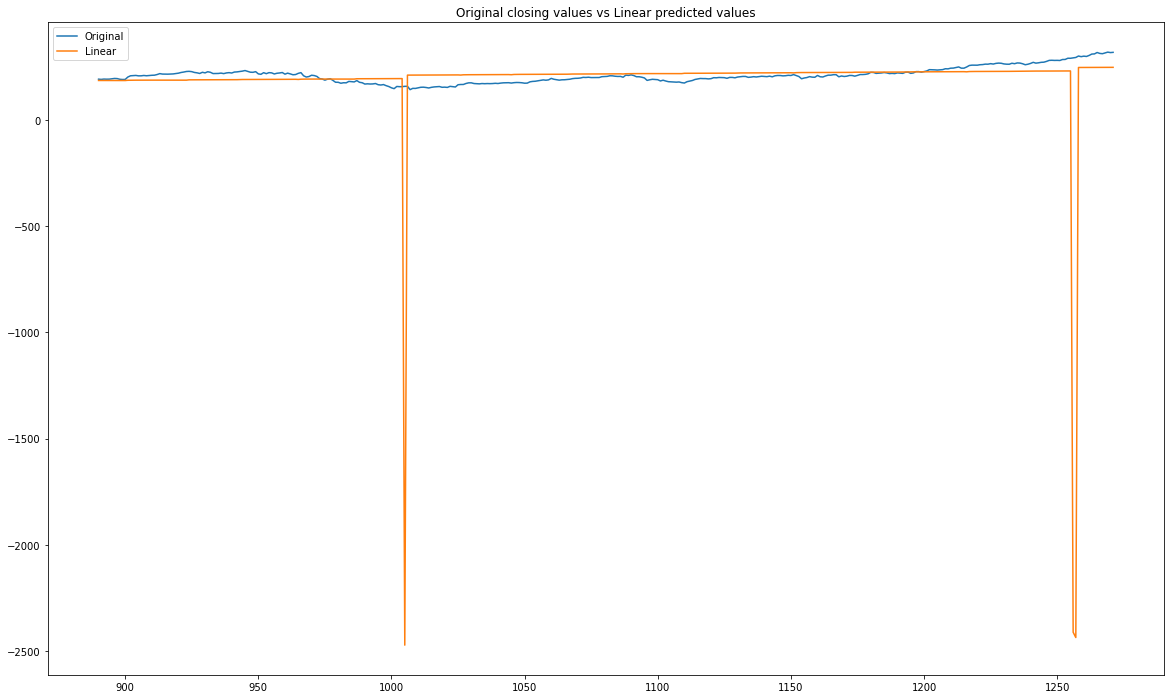

In [322]:
test_data['Predictions'] = y_pred

plt.figure(figsize=(20,12))
plt.title("Original closing values vs Linear predicted values")
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions'], label="Linear")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


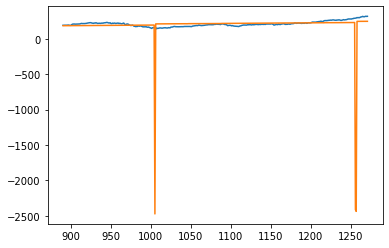

In [323]:
#plot

test_data['Predictions'] = 0
test_data['Predictions'] = y_pred

test_data.index = new_data[int(len(new_data)*0.7):].index
train_data.index = new_data[:int(len(new_data)*0.7)].index

#plt.plot(train_data['close'])
plt.plot(test_data[['close', 'Predictions']])

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.


### Ridge Regression

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.


So ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

In [324]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [325]:
#make predictions and find the rmse
y_pred = rr.predict(X_test)
rr_rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rr_rms

240.2250777970775

In [326]:
rr1 = Ridge(alpha=100)
rr1.fit(X_train, y_train)
y_pred = rr1.predict(X_test)
rr_rms1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rr_rms1

102.92284279157101

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


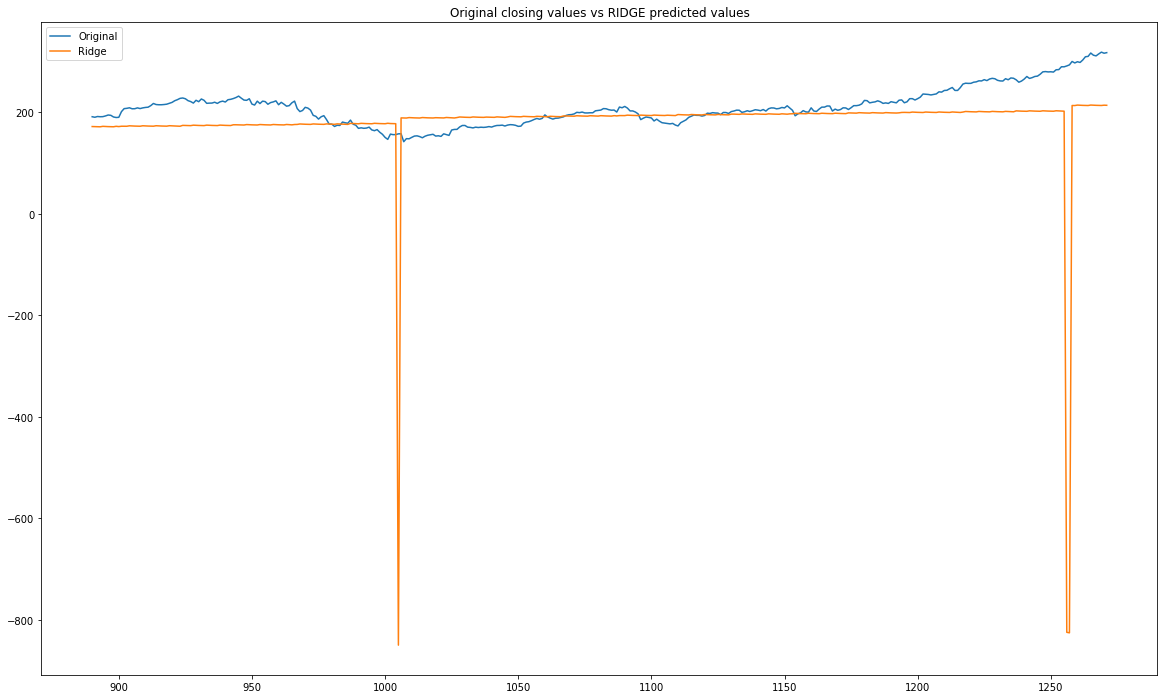

In [327]:
test_data['Predictions_rr'] = y_pred

plt.figure(figsize=(20,12))
plt.title("Original closing values vs RIDGE predicted values")
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_rr'], label="Ridge")
plt.legend()
plt.show()

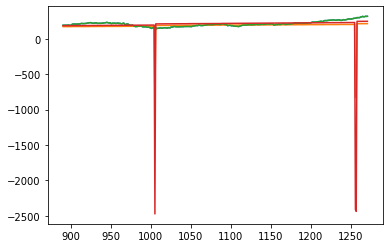

In [328]:
#plot

test_data.index = new_data[int(len(new_data)*0.7):].index
train_data.index = new_data[:int(len(new_data)*0.7)].index

#plt.plot(train_data['close'])
plt.plot(test_data[['close', 'Predictions_rr']])
plt.plot(test_data[['close', 'Predictions']])

In [329]:
test_data[['close', 'Predictions', 'Predictions_rr']]

,close,Predictions,Predictions_rr
890,191.45,185.306010,172.104737
891,190.4,185.322284,171.897339
892,191.88,185.338558,171.689941
893,191.44,185.422449,171.605009
894,191.61,185.590660,172.501558
...,...,...,...
1267,311.34,246.927889,213.906537
1268,315.24,246.944164,213.699139
1269,318.73,247.028055,213.614207
1270,316.57,247.144923,214.180893


### Lasso Regression : 

The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as
Image for post

So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.


In [330]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
lasso_rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
lasso_rms

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56625.44271645492, tolerance: 68.83650984284468
  positive)


68.7319464174273

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


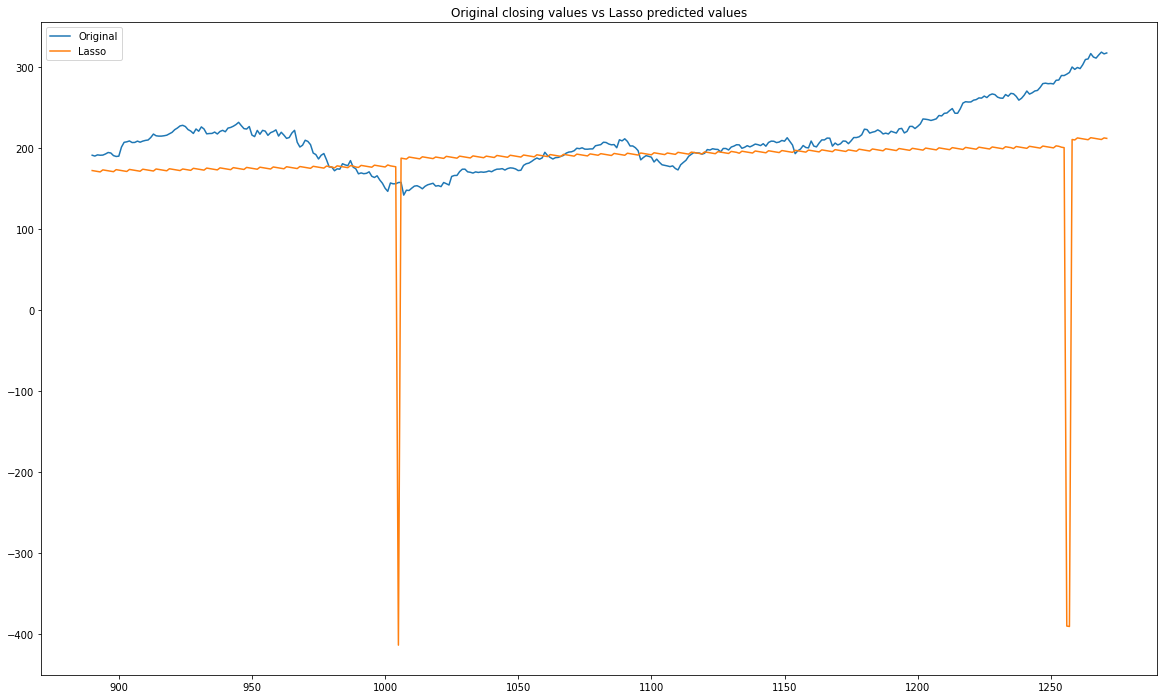

In [331]:
test_data['Predictions_lasso'] = y_pred

plt.figure(figsize=(20,12))
plt.title("Original closing values vs Lasso predicted values")
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_lasso'], label="Lasso")
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


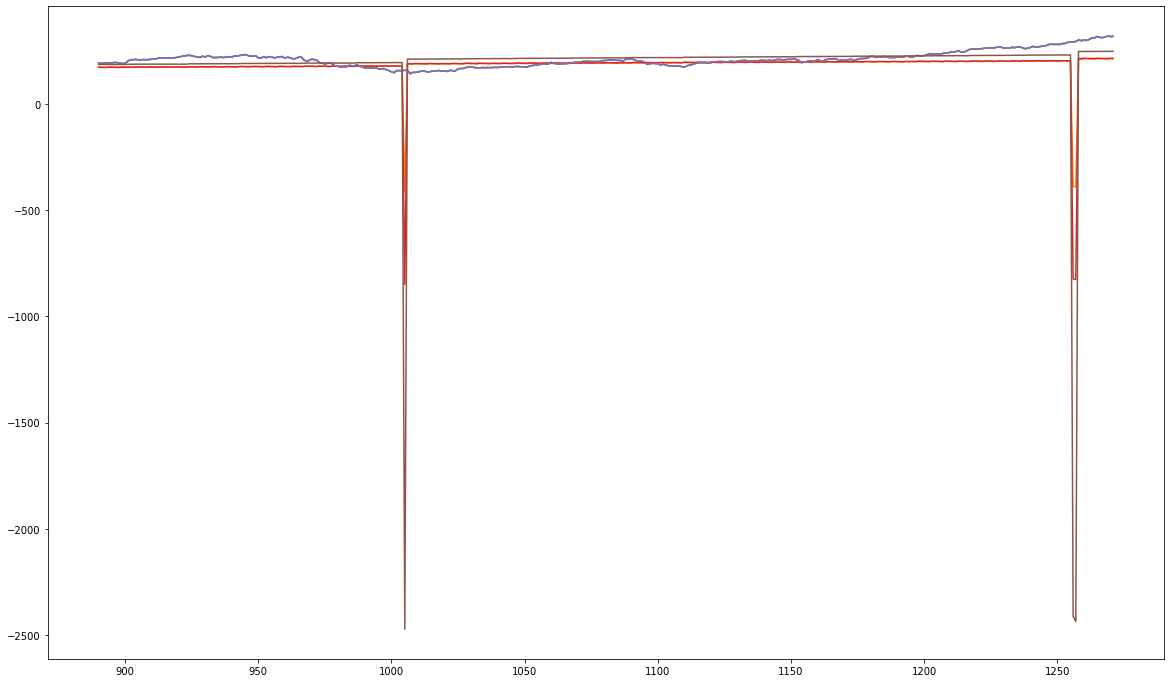

In [332]:
test_data['Predictions_lasso'] = 0
test_data['Predictions_lasso'] = y_pred

test_data.index = new_data[int(len(new_data)*0.7):].index
train_data.index = new_data[:int(len(new_data)*0.7)].index

plt.figure(figsize=(20,12))
#plt.plot(train_data['close'])
plt.plot(test_data[['close', 'Predictions_lasso']])
plt.plot(test_data[['close', 'Predictions_rr']])
plt.plot(test_data[['close', 'Predictions']])

In [333]:
test_data[['close', 'Predictions', 'Predictions_rr', 'Predictions_lasso']][100:150]

,close,Predictions,Predictions_rr,Predictions_lasso
990,168.49,193.537249,177.529592,176.373925
991,169.6,193.705460,178.426141,178.885932
992,168.63,193.654117,178.096278,178.326989
993,169.1,193.670391,177.888880,177.768047
994,170.95,193.686665,177.681482,177.209105
995,165.48,193.770556,177.596550,176.650162
996,163.94,193.938767,178.493099,179.162169
997,166.07,193.887424,178.163236,178.603226
998,160.89,193.903698,177.955838,178.044284
999,156.83,193.919973,177.748440,177.485342


### 4. k-Nearest Neighbours

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points. 

In [334]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [335]:

#scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,y_train)
pred_knn = model.predict(X_test)

In [336]:
knn_rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred_knn)),2)))
knn_rms

87.94798745836411

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


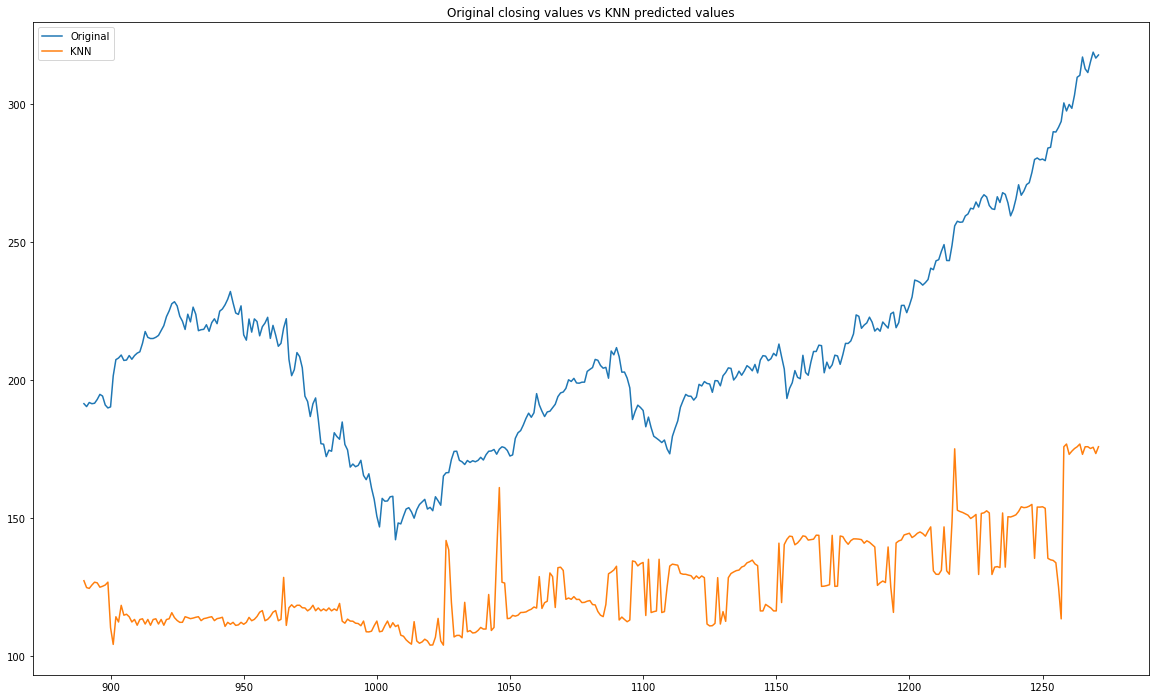

In [337]:
test_data['Predictions_knn'] = pred_knn

plt.figure(figsize=(20,12))
plt.title("Original closing values vs KNN predicted values")
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_knn'], label= "KNN")
plt.legend()
plt.show()

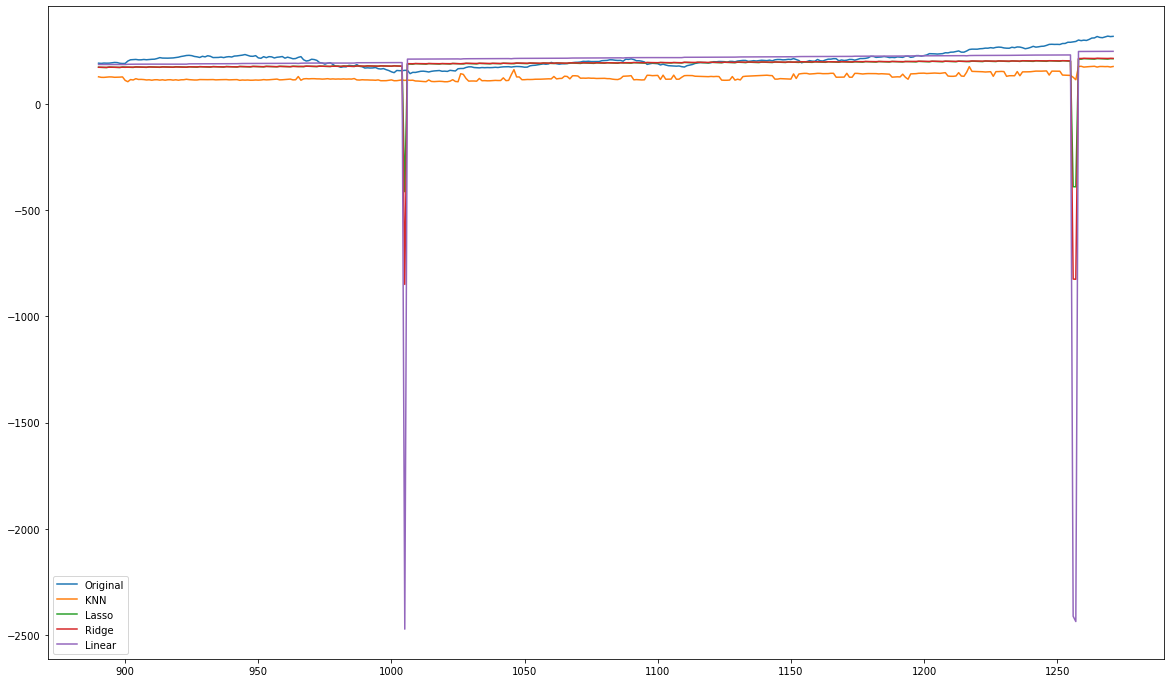

In [338]:

test_data.index = new_data[int(len(new_data)*0.7):].index
train_data.index = new_data[:int(len(new_data)*0.7)].index

plt.figure(figsize=(20,12))
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_knn'], label= "KNN")
plt.plot(test_data['Predictions_lasso'], label="Lasso")
plt.plot(test_data['Predictions_rr'], label="Ridge")
plt.plot(test_data['Predictions'], label="Linear")
plt.legend()
plt.show()

In [339]:
test_data[['close', 'Predictions', 'Predictions_rr', 'Predictions_lasso', 'Predictions_knn']][100:150]

,close,Predictions,Predictions_rr,Predictions_lasso,Predictions_knn
990,168.49,193.537249,177.529592,176.373925,112.747
991,169.6,193.705460,178.426141,178.885932,112.697
992,168.63,193.654117,178.096278,178.326989,111.983
993,169.1,193.670391,177.888880,177.768047,111.857
994,170.95,193.686665,177.681482,177.209105,111.06
995,165.48,193.770556,177.596550,176.650162,112.747
996,163.94,193.938767,178.493099,179.162169,108.877
997,166.07,193.887424,178.163236,178.603226,108.82
998,160.89,193.903698,177.955838,178.044284,109.09
999,156.83,193.919973,177.748440,177.485342,111.06


### Auto ARIMA

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

- p (past values used for forecasting the next value)
- q (past forecast errors used to predict the future values)
- d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

In [340]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train_data1 = data[:int(len(new_data)*0.7)]
test_data1 = data[int(len(new_data)*0.7):]

training = train_data1['close']
validation = test_data1['close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4252.561, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3971.728, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4250.065, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3841.783, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3847.201, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3841.203, Time=0.79 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3972.154, Time=0.32 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.22 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=3843.193, Time=0.83 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=3843.1

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [341]:
# Give number of periods as length of test data
forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction_ARIMA'])

In [342]:
test_data['Prediction_ARIMA'] = forecast

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [343]:
ARIMA_rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(forecast)),2)))
ARIMA_rms

38.04210706626352

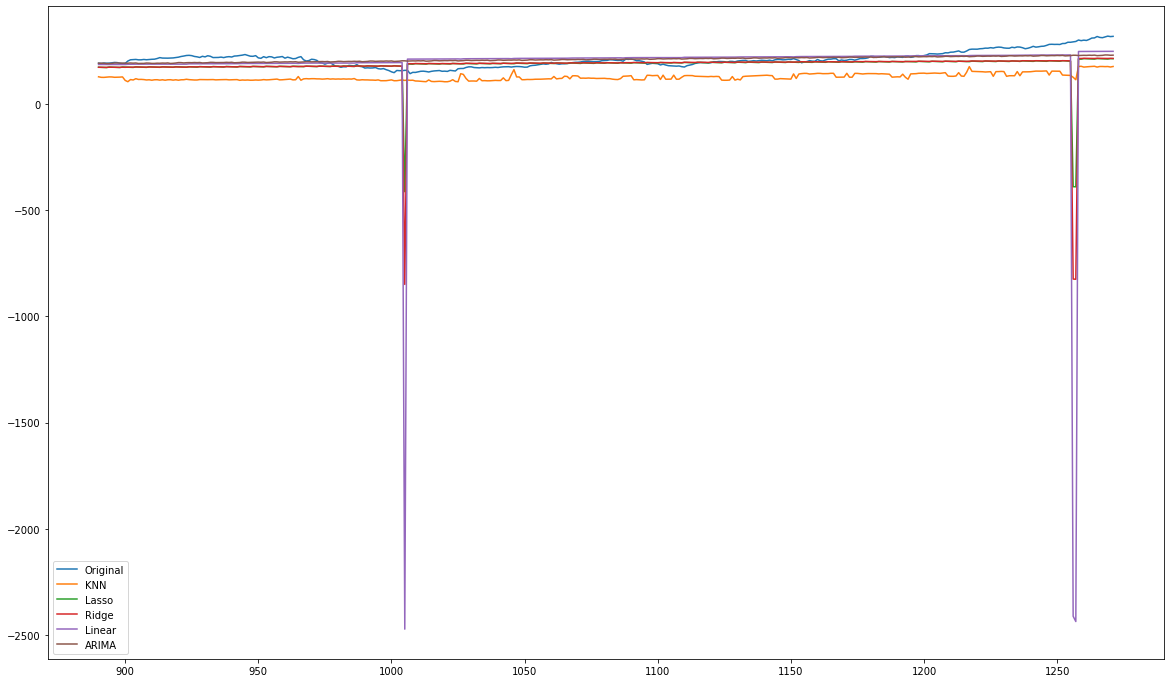

In [344]:
plt.figure(figsize=(20,12))
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_knn'], label= "KNN")
plt.plot(test_data['Predictions_lasso'], label="Lasso")
plt.plot(test_data['Predictions_rr'], label="Ridge")
plt.plot(test_data['Predictions'], label="Linear")
plt.plot(test_data['Prediction_ARIMA'], label="ARIMA")
plt.legend()
plt.show()

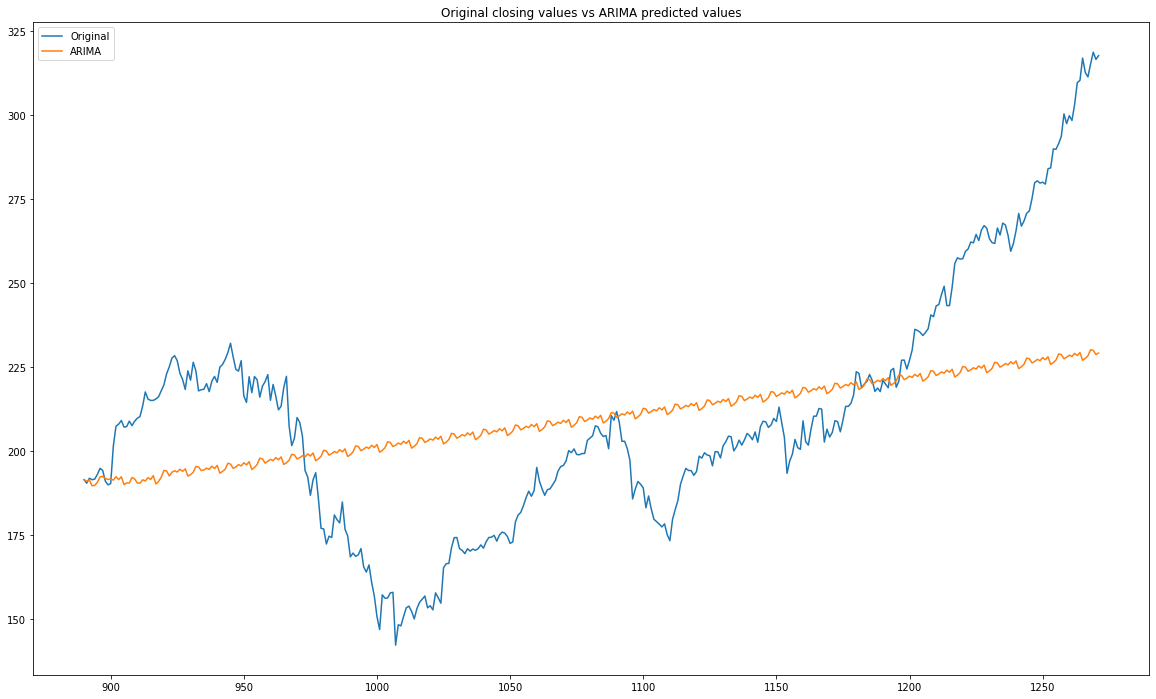

In [345]:
plt.figure(figsize=(20,12))
plt.plot(test_data['close'], label = "Original")
plt.title("Original closing values vs ARIMA predicted values")
plt.plot(test_data['Prediction_ARIMA'], label="ARIMA")
plt.legend()
plt.show()

As we saw earlier, an auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part. In the next section, we will implement a time series model that takes both trend and seasonality of a series into account.

In [346]:
test_data[['close', 'Predictions', 'Predictions_rr', 'Predictions_lasso', 'Predictions_knn', 'Prediction_ARIMA']][100:150]

,close,Predictions,Predictions_rr,Predictions_lasso,Predictions_knn,Prediction_ARIMA
990,168.49,193.537249,177.529592,176.373925,112.747,198.893489
991,169.6,193.705460,178.426141,178.885932,112.697,199.697846
992,168.63,193.654117,178.096278,178.326989,111.983,201.509099
993,169.1,193.670391,177.888880,177.768047,111.857,201.316080
994,170.95,193.686665,177.681482,177.209105,111.06,200.076528
995,165.48,193.770556,177.596550,176.650162,112.747,200.548669
996,163.94,193.938767,178.493099,179.162169,108.877,201.138937
997,166.07,193.887424,178.163236,178.603226,108.82,200.760827
998,160.89,193.903698,177.955838,178.044284,109.09,201.674508
999,156.83,193.919973,177.748440,177.485342,111.06,201.032195


#### 7. Long Short Term Memory (LSTM)

Introduction

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

- The input gate: The input gate adds information to the cell state
- The forget gate: It removes the information that is no longer required by the model
- The output gate: Output Gate at LSTM selects the information to be shown as output

In [347]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [348]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]

In [349]:
#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

In [350]:
#creating train and test sets
dataset = new_data.values

In [351]:
#split into train and validation
train= dataset[:int(len(new_data)*0.7)]
test = dataset[int(len(new_data)*0.7):]

In [352]:
train.shape, test_data.shape

((890, 1), (382, 19))

In [353]:
dataset

array([[109.33],
       [106.25],
       [106.26],
       ...,
       [318.73],
       [316.57],
       [317.7]], dtype=object)

In [354]:
#converting dataset into x_train and y_train

# Normalizing the closing price data using MinMax scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_lstm = scaler.fit_transform(dataset)

In [355]:
# Considering time step of 60 to predict single output variable
X_train, y_train = [], []
for i in range(60,len(train)):
    X_train.append(scaled_data_lstm[i-60:i,0])
    y_train.append(scaled_data_lstm[i,0])

In [356]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [357]:
X_train.shape, y_train.shape

((830, 60), (830,))

In [358]:
X_train[0]

array([0.08314725, 0.06966154, 0.06970533, 0.07622926, 0.09435615,
       0.09488156, 0.08279697, 0.08704409, 0.08520513, 0.07215727,
       0.06852314, 0.08047638, 0.08411051, 0.09658917, 0.09912868,
       0.0996541 , 0.08231534, 0.10933053, 0.12504926, 0.11743071,
       0.12386707, 0.12395464, 0.12793905, 0.12960287, 0.12518061,
       0.12863961, 0.1387101 , 0.15123254, 0.15815053, 0.16086519,
       0.16414904, 0.16802399, 0.1668637 , 0.1714392 , 0.18678576,
       0.18315163, 0.16835238, 0.1754674 , 0.16690748, 0.16966592,
       0.17084811, 0.16725776, 0.15793161, 0.15876352, 0.1611279 ,
       0.1496125 , 0.13967337, 0.1493498 , 0.14558431, 0.15153903,
       0.16069005, 0.16695127, 0.16268225, 0.15569859, 0.16143439,
       0.15915758, 0.14466483, 0.14843032, 0.14409563, 0.15775647])

In [359]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [360]:
X_train.shape

(830, 60, 1)

In [361]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)



Epoch 1/20
 - 5s - loss: 0.0058
Epoch 2/20
 - 4s - loss: 7.1083e-04
Epoch 3/20
 - 5s - loss: 5.6912e-04
Epoch 4/20
 - 4s - loss: 4.9538e-04
Epoch 5/20
 - 4s - loss: 5.0596e-04
Epoch 6/20
 - 4s - loss: 4.6962e-04
Epoch 7/20
 - 4s - loss: 4.4958e-04
Epoch 8/20
 - 4s - loss: 4.6360e-04
Epoch 9/20
 - 4s - loss: 5.1469e-04
Epoch 10/20
 - 4s - loss: 4.2127e-04
Epoch 11/20
 - 4s - loss: 4.1213e-04
Epoch 12/20
 - 5s - loss: 4.3314e-04
Epoch 13/20
 - 4s - loss: 3.7739e-04
Epoch 14/20
 - 4s - loss: 3.4911e-04
Epoch 15/20
 - 4s - loss: 3.3321e-04
Epoch 16/20
 - 4s - loss: 3.5540e-04
Epoch 17/20
 - 4s - loss: 3.5454e-04
Epoch 18/20
 - 4s - loss: 3.2980e-04
Epoch 19/20
 - 4s - loss: 3.0051e-04
Epoch 20/20
 - 4s - loss: 3.8749e-04


In [362]:
#predicting 382 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [363]:
# getting X-test data with time step of 60
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [364]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price_lstm = closing_price
closing_price = scaler.inverse_transform(closing_price)

In [365]:
LSTM_rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
LSTM_rms

9.181742783492545

The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease? Certainly not!

In [366]:
test_data['Predictions_LSTM'] = closing_price

In [367]:
test_data.head()

,date,close,year,week,month,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,mon_fri,Predictions,Predictions_rr,Predictions_lasso,Predictions_knn,Prediction_ARIMA,Predictions_LSTM
890,2018-07-17 00:00:00+00:00,191.45,2018,29,7,1,198,False,False,False,False,False,False,0,185.306010,172.104737,172.526013,127.35,191.467441,188.249146
891,2018-07-18 00:00:00+00:00,190.4,2018,29,7,2,199,False,False,False,False,False,False,0,185.322284,171.897339,171.967071,124.87,191.004448,188.775879
892,2018-07-19 00:00:00+00:00,191.88,2018,29,7,3,200,False,False,False,False,False,False,0,185.338558,171.689941,171.408128,124.58,191.345176,189.116608
893,2018-07-20 00:00:00+00:00,191.44,2018,29,7,4,201,False,False,False,False,False,False,1,185.422449,171.605009,170.849186,125.8,189.630566,189.346085
894,2018-07-23 00:00:00+00:00,191.61,2018,30,7,0,204,False,False,False,False,False,False,1,185.590660,172.501558,173.361192,126.833,189.753844,189.475845


In [368]:
test_data[['close', 'Predictions', 'Predictions_rr', 'Predictions_lasso', 'Predictions_knn','Prediction_ARIMA', 'Predictions_LSTM']][100:150]

,close,Predictions,Predictions_rr,Predictions_lasso,Predictions_knn,Prediction_ARIMA,Predictions_LSTM
990,168.49,193.537249,177.529592,176.373925,112.747,198.893489,178.724731
991,169.6,193.705460,178.426141,178.885932,112.697,199.697846,178.592072
992,168.63,193.654117,178.096278,178.326989,111.983,201.509099,177.767578
993,169.1,193.670391,177.888880,177.768047,111.857,201.316080,176.412125
994,170.95,193.686665,177.681482,177.209105,111.06,200.076528,174.803421
995,165.48,193.770556,177.596550,176.650162,112.747,200.548669,173.284775
996,163.94,193.938767,178.493099,179.162169,108.877,201.138937,171.757797
997,166.07,193.887424,178.163236,178.603226,108.82,200.760827,170.187027
998,160.89,193.903698,177.955838,178.044284,109.09,201.674508,168.757233
999,156.83,193.919973,177.748440,177.485342,111.06,201.032195,167.309372


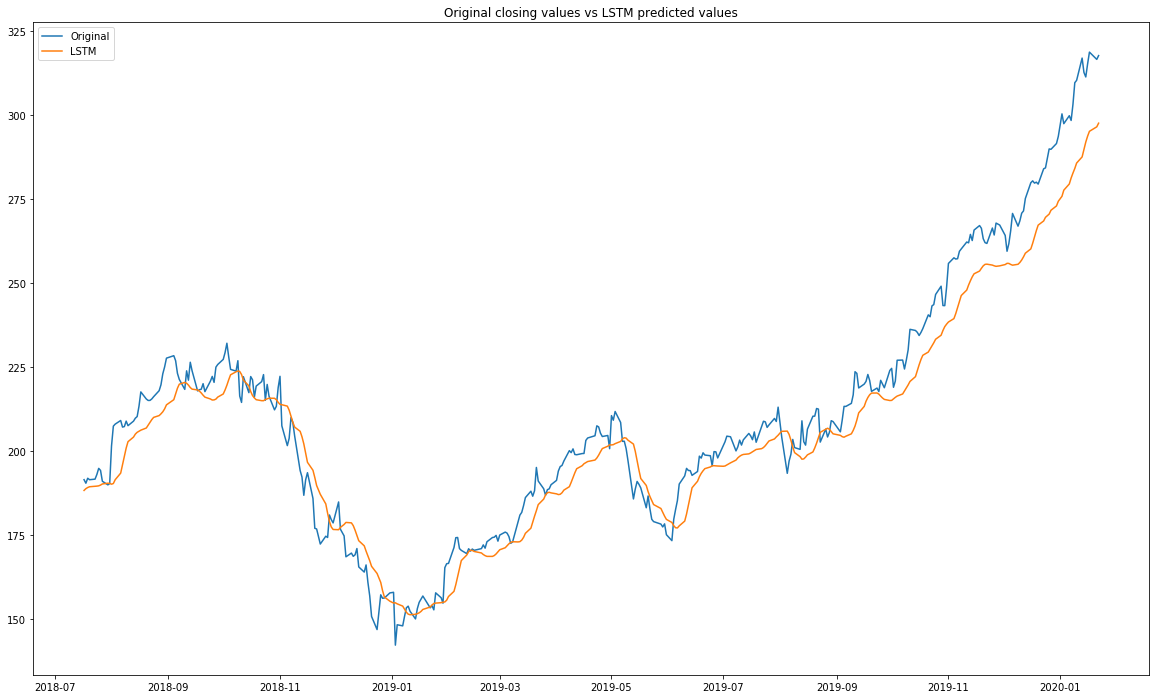

In [369]:
test_data.index = new_data[int(len(new_data)*0.7):].index
train_data.index = new_data[:int(len(new_data)*0.7)].index
plt.figure(figsize=(20,12))
plt.title("Original closing values vs LSTM predicted values")
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_LSTM'], label="LSTM")
plt.legend()
plt.show()

Inference:
    
LSTM has the lowest RMSE error value compared to all the other models and is tend to follow the original closing values of AAPLE stocck price which includes the pandemic time impact on stock values. LSTM is highly recommended for STOCK price prediction. Moreover, LSTM model allows to follow both seasonality, trend of data.

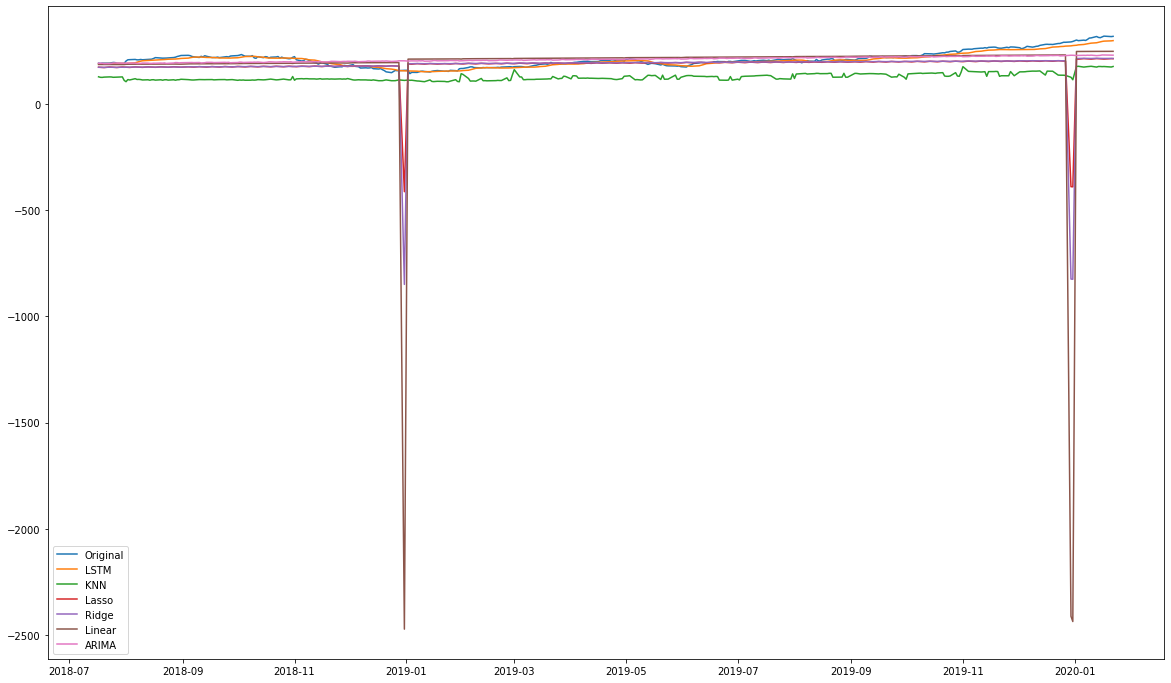

In [370]:
plt.figure(figsize=(20,12))
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_LSTM'], label="LSTM")
plt.plot(test_data['Predictions_knn'], label="KNN")
plt.plot(test_data['Predictions_lasso'], label="Lasso")
plt.plot(test_data['Predictions_rr'], label="Ridge")
plt.plot(test_data['Predictions'], label="Linear")
plt.plot(test_data['Prediction_ARIMA'], label="ARIMA")
plt.legend()
plt.show()

### 8. Bidirections LSTM

In [371]:
from keras.layers import Bidirectional
# create and fit the LSTM network
model1 = Sequential()
model1.add(Bidirectional(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1],1))))
model1.add(Bidirectional(LSTM(100, return_sequences=True)))
model1.add(Bidirectional(LSTM(units=50)))
model1.add(Dense(1))

model1.compile(loss='mean_squared_error', optimizer='adam')
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
 - 8s - loss: 0.0051
Epoch 2/20
 - 7s - loss: 7.2991e-04
Epoch 3/20
 - 7s - loss: 3.9640e-04
Epoch 4/20
 - 7s - loss: 3.1555e-04
Epoch 5/20
 - 7s - loss: 3.0000e-04
Epoch 6/20
 - 7s - loss: 2.6393e-04
Epoch 7/20
 - 7s - loss: 2.4821e-04
Epoch 8/20
 - 7s - loss: 2.4281e-04
Epoch 9/20
 - 7s - loss: 2.9303e-04
Epoch 10/20
 - 7s - loss: 2.4576e-04
Epoch 11/20
 - 7s - loss: 2.1912e-04
Epoch 12/20
 - 7s - loss: 1.9806e-04
Epoch 13/20
 - 7s - loss: 1.7447e-04
Epoch 14/20
 - 7s - loss: 1.8616e-04
Epoch 15/20
 - 7s - loss: 1.8827e-04
Epoch 16/20
 - 7s - loss: 1.7799e-04
Epoch 17/20
 - 7s - loss: 1.8398e-04
Epoch 18/20
 - 7s - loss: 1.5957e-04
Epoch 19/20
 - 7s - loss: 1.6940e-04
Epoch 20/20
 - 7s - loss: 2.0943e-04


In [386]:
X_train.shape

(830, 60, 1)

In [387]:
#predicting 382 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [388]:
len(new_data) - len(test) - 60

830

In [389]:
# getting X-test data with time step of 60
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


In [390]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price1 = model1.predict(X_test)
closing_price_bilstm = closing_price1
closing_price1 = scaler.inverse_transform(closing_price1)

In [391]:
BiLSTM_rms=np.sqrt(np.mean(np.power((test-closing_price1),2)))
BiLSTM_rms

7.0672436264377385

In [392]:
test_data['Predictions_BiLSTM'] = closing_price1

In [393]:
test_data[['close', 'Predictions', 'Predictions_rr', 'Predictions_lasso', 'Predictions_knn','Prediction_ARIMA', 'Predictions_LSTM', 'Predictions_BiLSTM']][100:150]

,close,Predictions,Predictions_rr,Predictions_lasso,Predictions_knn,Prediction_ARIMA,Predictions_LSTM,Predictions_BiLSTM
date,,,,,,,,
2018-12-07 00:00:00+00:00,168.49,193.537249,177.529592,176.373925,112.747,198.893489,178.724731,188.762268
2018-12-10 00:00:00+00:00,169.6,193.705460,178.426141,178.885932,112.697,199.697846,178.592072,186.356400
2018-12-11 00:00:00+00:00,168.63,193.654117,178.096278,178.326989,111.983,201.509099,177.767578,184.365891
2018-12-12 00:00:00+00:00,169.1,193.670391,177.888880,177.768047,111.857,201.316080,176.412125,182.485367
2018-12-13 00:00:00+00:00,170.95,193.686665,177.681482,177.209105,111.06,200.076528,174.803421,181.169983
2018-12-14 00:00:00+00:00,165.48,193.770556,177.596550,176.650162,112.747,200.548669,173.284775,180.735306
2018-12-17 00:00:00+00:00,163.94,193.938767,178.493099,179.162169,108.877,201.138937,171.757797,179.248779
2018-12-18 00:00:00+00:00,166.07,193.887424,178.163236,178.603226,108.82,200.760827,170.187027,177.682144
2018-12-19 00:00:00+00:00,160.89,193.903698,177.955838,178.044284,109.09,201.674508,168.757233,177.012802


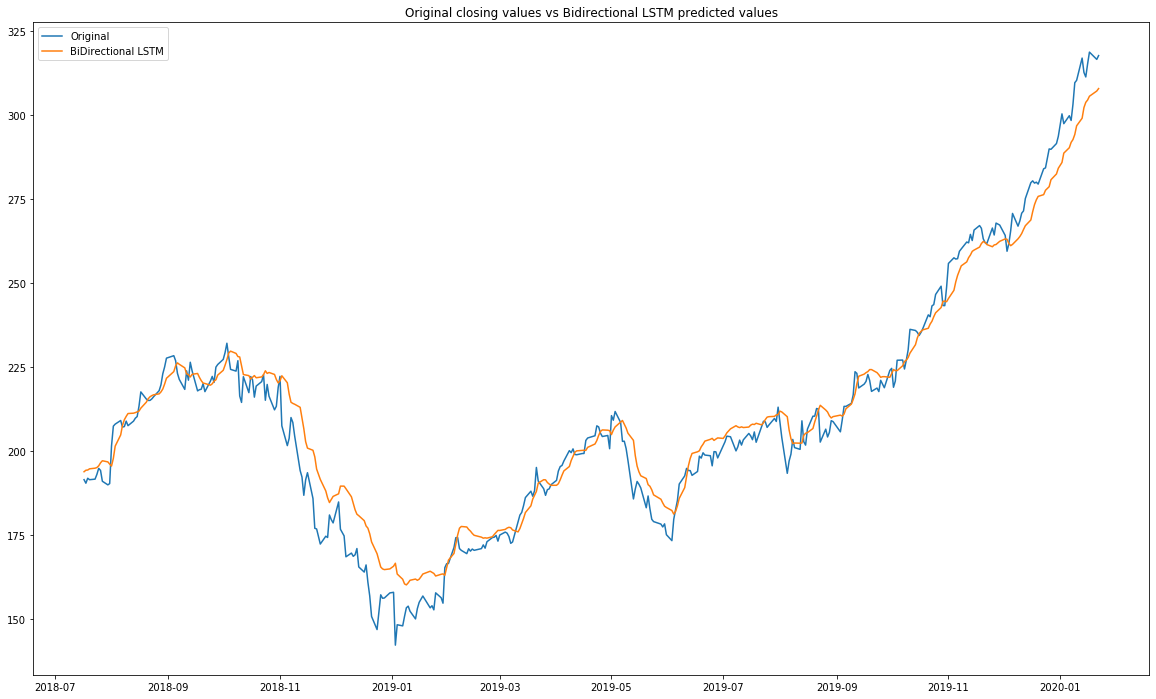

In [394]:
test_data.index = new_data[int(len(new_data)*0.7):].index
train_data.index = new_data[:int(len(new_data)*0.7)].index
plt.figure(figsize=(20,12))
plt.title("Original closing values vs Bidirectional LSTM predicted values")
plt.plot(test_data['close'], label = "Original")
plt.plot(test_data['Predictions_BiLSTM'], label="BiDirectional LSTM")
plt.legend()
plt.show()

### Inference:

Compared to stacked LSTM, bidirectional LSTM performed better with minimum RMSE error value. so we can conclude bidirectional LSTM as the best solution to predict stock prices.

In [395]:
### TO PREDICT 30 DAYS FUTURE SALES
test_data[['close', 'Predictions', 'Predictions_rr', 'Predictions_lasso', 'Predictions_knn','Prediction_ARIMA', 'Predictions_LSTM', 'Predictions_BiLSTM']][100:150]

,close,Predictions,Predictions_rr,Predictions_lasso,Predictions_knn,Prediction_ARIMA,Predictions_LSTM,Predictions_BiLSTM
date,,,,,,,,
2018-12-07 00:00:00+00:00,168.49,193.537249,177.529592,176.373925,112.747,198.893489,178.724731,188.762268
2018-12-10 00:00:00+00:00,169.6,193.705460,178.426141,178.885932,112.697,199.697846,178.592072,186.356400
2018-12-11 00:00:00+00:00,168.63,193.654117,178.096278,178.326989,111.983,201.509099,177.767578,184.365891
2018-12-12 00:00:00+00:00,169.1,193.670391,177.888880,177.768047,111.857,201.316080,176.412125,182.485367
2018-12-13 00:00:00+00:00,170.95,193.686665,177.681482,177.209105,111.06,200.076528,174.803421,181.169983
2018-12-14 00:00:00+00:00,165.48,193.770556,177.596550,176.650162,112.747,200.548669,173.284775,180.735306
2018-12-17 00:00:00+00:00,163.94,193.938767,178.493099,179.162169,108.877,201.138937,171.757797,179.248779
2018-12-18 00:00:00+00:00,166.07,193.887424,178.163236,178.603226,108.82,200.760827,170.187027,177.682144
2018-12-19 00:00:00+00:00,160.89,193.903698,177.955838,178.044284,109.09,201.674508,168.757233,177.012802
